# The main idea of the Noise analyis

We are trying to show that our method of finding the best way is better than the explained the naive way (which is just making a tree graph independent of the best distance and starting at the qubit 0 with the hadamard/CX chain). 

To show that our method is better especially because we can take into account the noise of our hardware we simulate the noise model by just multiplying the number of cx gates with a unpair number wich we call "multiplier". So if we increase the multiplier we increase the noise of our hardware. And then we compare the results of our method with the naive method.

In [5]:
%reload_ext autoreload
%autoreload 2

import graph_functions as gf
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import qiskit.providers.fake_provider as fp
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info import Statevector
import naive_functions as nf
import plot_functions as pf

# Generate the QC

In [41]:
#Initial property
backend = fp.FakeMelbourne()
multiplier = 3


# Naive circuit:

G = gf.get_graph_from_backend(backend=backend, fake=True, weight_function=lambda x: 1)
T = nf.graph_to_tree(G)
naive_qc = nf.generate_naive_noisy_qc_from_tree(T,  multiplier = multiplier)
print("\n\nDepth of found Naive QC:", naive_qc.depth(), "\n\n")

# Optimized circuit:

G = gf.get_graph_from_backend(backend=backend, fake=True, weight_function=lambda x: 1/(1-x**multiplier))
#gf.plot_graph(G)
optimal_root, dist, path_length = gf.minimal_max_distance_root(G)
print("\n\noptimal_root:", optimal_root, "dist:",  dist, "path_length:", path_length)
T = gf.get_tree_graph(G, optimal_root)
directed_T = gf.generate_directed_tree_from_root(T, optimal_root)
#plot_graph(T)
opt_qc = gf.generate_noisy_qc_from_tree(directed_T, optimal_root=optimal_root, multiplier = multiplier)
#print(qc)
print("\n\nDepth of found opt QC:", opt_qc.depth())
if opt_qc.depth() == path_length:
    print("\033[92m" + "\n\nOptimal QC found (meaning no splitting in equidistant potential distance neighbours)" + "\033[0m")

REPORT: get_graph_from_backend:
Number of qubits:  5
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [5]
Number of edges in new graph:  4
Number of nodes in new graph:  5


Depth of found Naive QC: 14 


REPORT: get_graph_from_backend:
Number of qubits:  5
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [5]
Number of edges in new graph:  4
Number of nodes in new graph:  5


optimal_root: 2 dist: 2 path_length: 3


Depth of found opt QC: 11


# Fidelity vs Multiplier

In [40]:
opt_fid = pf.get_GHZ_fidelity(opt_qc, backend, 100000)
print("\n\nFidelity of optimal QC:", opt_fid)

naive_fid = pf.get_GHZ_fidelity(naive_qc, backend, 100000)
print("\n\nFidelity of naive QC:", naive_fid)





Fidelity of optimal QC: 0.60994


Fidelity of naive QC: 0.61249


1
REPORT: get_graph_from_backend:
Number of qubits:  14
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [14]
Number of edges in new graph:  18
Number of nodes in new graph:  14
REPORT: get_graph_from_backend:
Number of qubits:  14
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [14]
Number of edges in new graph:  18
Number of nodes in new graph:  14


optimal_root: 4 dist: 4 path_length: 5
13
REPORT: get_graph_from_backend:
Number of qubits:  14
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [14]
Number of edges in new graph:  18
Number of nodes in new graph:  14
REPORT: get_graph_from_backend:
Number of qubits:  14
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [14]
Number of edges in new graph:  18
Number of nodes in new graph:  14


optimal_root: 4 dist: 4 

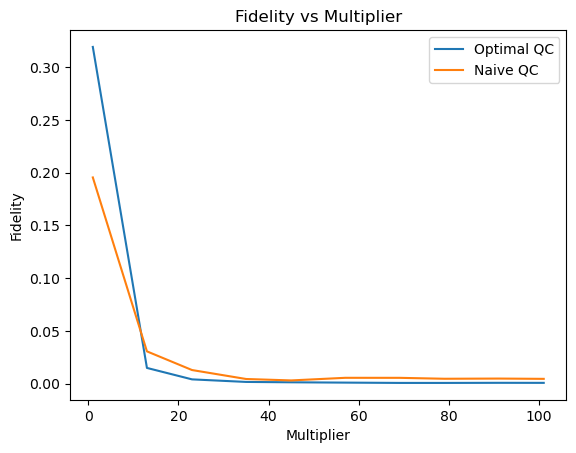

In [3]:
import matplotlib.pyplot as plt

backend = fp.FakeMelbourne()


# Generate an array of 10 odd numbers from 1 to 301
multipliers = np.linspace(1, 101, 10)
multipliers = np.round(multipliers)  # Round to nearest integer
multipliers = multipliers - (multipliers % 2 - 1)  # Ensure numbers are odd

# Convert to list and then to integers
multipliers = [int(x) for x in multipliers.tolist()]


# Lists to hold fidelities
opt_fidelities = []
naive_fidelities = []

# Loop over all multipliers
for multiplier in multipliers:
    print(multiplier)
    # Create your quantum circuits here based on the multiplier
    # Naive circuit:

    G = gf.get_graph_from_backend(backend=backend, fake=True, weight_function=lambda x: 1)
    T = nf.graph_to_tree(G)
    naive_qc = nf.generate_naive_noisy_qc_from_tree(T,  multiplier = multiplier)

    # Optimized circuit:

    G = gf.get_graph_from_backend(backend=backend, fake=True, weight_function=lambda x: 1/(1-x**multiplier))
    #gf.plot_graph(G)
    optimal_root, dist, path_length = gf.minimal_max_distance_root(G)
    print("\n\noptimal_root:", optimal_root, "dist:",  dist, "path_length:", path_length)
    T = gf.get_tree_graph(G, optimal_root)
    directed_T = gf.generate_directed_tree_from_root(T, optimal_root)
    #plot_graph(T)
    opt_qc = gf.generate_noisy_qc_from_tree(directed_T, optimal_root=optimal_root, multiplier = multiplier)
    #print(qc)

    

    # Compute the fidelities
    opt_fid = pf.get_GHZ_fidelity(opt_qc, backend, 100000)
    naive_fid = pf.get_GHZ_fidelity(naive_qc, backend, 100000)

    # Append fidelities to lists
    opt_fidelities.append(opt_fid)
    naive_fidelities.append(naive_fid)

# Plot fidelities
plt.plot(multipliers, opt_fidelities, label="Optimal QC")
plt.plot(multipliers, naive_fidelities, label="Naive QC")
plt.xlabel("Multiplier")
plt.ylabel("Fidelity")
plt.title("Fidelity vs Multiplier")
plt.legend()
plt.show()


# Same for a better ROI

1
gate error:
 0.018433175203418
gate error:
 0.014733467690550478
gate error:
 0.029074231952134683
gate error:
 0.031489707292669866
gate error:
 0.04481252727157908
gate error:
 0.027514912275282494
gate error:
 0.051557316888027144
gate error:
 0.035429301943697866
gate error:
 0.030605771841479945
gate error:
 0.027993700199691968
gate error:
 0.026498444370525315
gate error:
 0.029009283686826065
gate error:
 0.03419031200973366
gate error:
 0.021063772069955355
gate error:
 0.01785777064032057
gate error:
 0.05560385413564303
gate error:
 0.0430544071637424
gate error:
 0.026085358646657064
REPORT: get_graph_from_backend:
Number of qubits:  14
Number of weight 1 edges:  0
Number of connected components:  1
with number of nodes in each component:  [14]
Number of edges in new graph:  18
Number of nodes in new graph:  14
gate error:
 0.018433175203418
gate error:
 0.014733467690550478
gate error:
 0.029074231952134683
gate error:
 0.031489707292669866
gate error:
 0.044812527271579

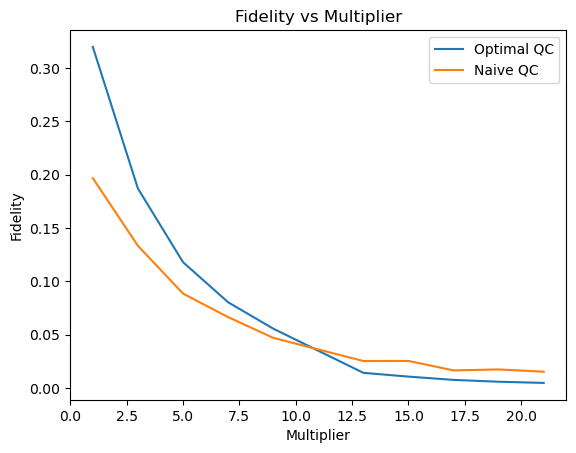

In [4]:
import matplotlib.pyplot as plt

backend = fp.FakeMelbourne()


# Generate an array of 10 odd numbers from 1 to 301
multipliers = np.linspace(1, 20, 10)
multipliers = np.round(multipliers)  # Round to nearest integer
multipliers = multipliers - (multipliers % 2 - 1)  # Ensure numbers are odd

# Convert to list and then to integers
multipliers = [int(x) for x in multipliers.tolist()]


# Lists to hold fidelities
opt_fidelities = []
naive_fidelities = []

# Loop over all multipliers
for multiplier in multipliers:
    print(multiplier)
    # Create your quantum circuits here based on the multiplier
    # Naive circuit:

    G = gf.get_graph_from_backend(backend=backend, fake=True, weight_function=lambda x: 1)
    T = nf.graph_to_tree(G)
    naive_qc = nf.generate_naive_noisy_qc_from_tree(T,  multiplier = multiplier)

    # Optimized circuit:

    G = gf.get_graph_from_backend(backend=backend, fake=True, weight_function=lambda x: 1/(1-x**multiplier))
    #gf.plot_graph(G)
    optimal_root, dist, path_length = gf.minimal_max_distance_root(G)
    print("\n\noptimal_root:", optimal_root, "dist:",  dist, "path_length:", path_length)
    T = gf.get_tree_graph(G, optimal_root)
    directed_T = gf.generate_directed_tree_from_root(T, optimal_root)
    #plot_graph(T)
    opt_qc = gf.generate_noisy_qc_from_tree(directed_T, optimal_root=optimal_root, multiplier = multiplier)
    #print(qc)

    

    # Compute the fidelities
    opt_fid = pf.get_GHZ_fidelity(opt_qc, backend, 100000)
    naive_fid = pf.get_GHZ_fidelity(naive_qc, backend, 100000)

    # Append fidelities to lists
    opt_fidelities.append(opt_fid)
    naive_fidelities.append(naive_fid)

# Plot fidelities
plt.plot(multipliers, opt_fidelities, label="Optimal QC")
plt.plot(multipliers, naive_fidelities, label="Naive QC")
plt.xlabel("Multiplier")
plt.ylabel("Fidelity")
plt.title("Fidelity vs Multiplier")
plt.legend()
plt.show()


=> There is a big improvement of around 30%-50% of the fidelity of our Optimized over the naive way of doing!! This method can be generalized for any backend structure directly using graph theory! 

The real benefit comes from a much bigger structure but since we could only simulate it for 14 qubits at most we could not show the potential of that method! But even with that structure we could see a big improvement in the fidelity of the circuit for the state preparation of the GHZ state!



# Plots regarding the noise

The following is some plotting to show how we got the fidelity

In [ ]:
# Define your ideal counts, based on your ideal state
N = qc.num_qubits  # Replace this with your number of qubits
ideal_counts = {"0" * N: 500, "1" * N: 500}  # Replace 500 with your expected counts


# Get the total number of shots from your noisy simulation
total_shots = sum(counts_noise.values())

# Normalize the ideal_counts to the same total number of shots
normalized_ideal_counts = {state: count * total_shots / sum(ideal_counts.values()) for state, count in ideal_counts.items()}

# Calculate the fidelity
fidelity = sum(min(counts_noise.get(state, 0), count) for state, count in normalized_ideal_counts.items()) / total_shots

print(fidelity)


0.3017578125
